# Machine Learning Algorithms

Linear Regression

In [55]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [56]:
df_home_prices=pd.read_csv('data/home_prices.csv')
df_home_prices.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [57]:
df_homeprices=pd.read_csv('data/homeprices.csv')
df_homeprices.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [58]:
df_homeprices.isnull().sum()

area     0
price    0
dtype: int64

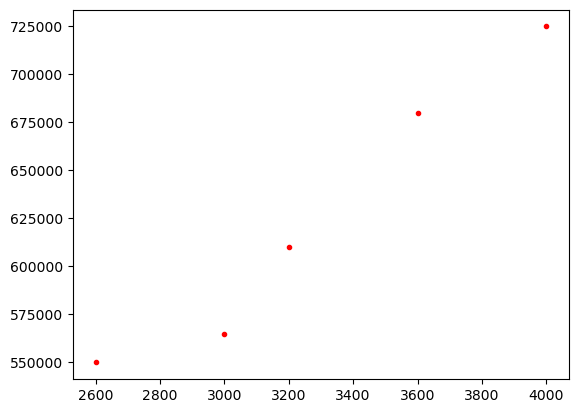

In [59]:
plt.scatter(df_homeprices.area,df_homeprices.price,color='red',marker='.')

In [60]:
new_df=df_homeprices.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [61]:
prices=df_homeprices[['price']]
prices

,price
0,550000
1,565000
2,610000
3,680000
4,725000


In [62]:
reg=linear_model.LinearRegression()
reg.fit(new_df,prices)

LinearRegression()

In [63]:
reg.predict([[3300]])

/home/aayush/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[628715.75342466]])

In [64]:
reg.coef_[0][0]

135.78767123287673

In [65]:
reg.intercept_[0]

180616.43835616432

In [66]:
3300*reg.coef_[0][0]+reg.intercept_[0]

628715.7534246575

# Generate CSV file with list of home predictions

In [67]:
area_df=pd.read_csv('data/areas.csv')
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [68]:
p = reg.predict(area_df)
p

array([[ 316404.10958904],
       [ 384297.94520548],
       [ 492928.08219178],
       [ 661304.79452055],
       [ 740061.64383562],
       [ 799808.21917808],
       [ 926090.75342466],
       [ 650441.78082192],
       [ 825607.87671233],
       [ 492928.08219178],
       [1402705.47945205],
       [1348390.4109589 ],
       [1144708.90410959]])

In [69]:
area_df['prices']=p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [70]:
# area_df.to_csv('data/prediction.csv')

In [71]:
df_home_prices

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


data preprocessing

In [72]:
df_home_prices.bedrooms.median()

4.0

In [73]:
df_home_prices.bedrooms=df_home_prices.bedrooms.fillna(df_home_prices.bedrooms.median())
df_home_prices

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [74]:
df_home_prices.corr()

,area,bedrooms,age,price
area,1.000000,0.751710,-0.445300,0.901476
bedrooms,0.751710,1.000000,-0.877221,0.919803
age,-0.445300,-0.877221,1.000000,-0.734167
price,0.901476,0.919803,-0.734167,1.000000


In [75]:
reg=linear_model.LinearRegression()
reg.fit(df_home_prices.drop('price',axis='columns'),df_home_prices.price)

LinearRegression()

Price of home with 3000 sqr ft area , 3 bedrooms, 40 year old

In [76]:
reg.predict([[3000,3,40]])

/home/aayush/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [77]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [78]:
reg.intercept_

221323.0018654043

In [1]:
import pandas as pd
df_titanic=pd.read_csv('data/titanic.csv')
df_titanic.head()
df=df_titanic

In [3]:
%who

df	 df_titanic	 pd	 


In [81]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [82]:
df

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [83]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Survived      0
dtype: int64

In [84]:
inputs=df.drop('Survived',axis='columns')
target=df.Survived
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [85]:
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [86]:
target.dtypes

dtype('int64')

In [87]:
dummies=pd.get_dummies(inputs.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [88]:
dummies.corr()

,female,male
female,1.0,-1.0
male,-1.0,1.0


In [89]:
inputs=pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [90]:
inputs.drop(['Sex','male'],axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1


In [91]:
inputs.isna().sum()

Pclass      0
Age       177
Fare        0
female      0
dtype: int64

In [92]:
inputs.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [93]:
inputs.mean()

Pclass     2.308642
Age       29.699118
Fare      32.204208
female     0.352413
dtype: float64

In [94]:
inputs.median()
inputs.max()

Pclass      3.0000
Age        80.0000
Fare      512.3292
female      1.0000
dtype: float64

In [95]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [96]:
inputs.isnull().sum()

Pclass    0
Age       0
Fare      0
female    0
dtype: int64

In [97]:
inputs

,Pclass,Age,Fare,female
0,3,22.000000,7.2500,0
1,1,38.000000,71.2833,1
2,3,26.000000,7.9250,1
3,1,35.000000,53.1000,1
4,3,35.000000,8.0500,0
...,...,...,...,...
886,2,27.000000,13.0000,0
887,1,19.000000,30.0000,1
888,3,29.699118,23.4500,1
889,1,26.000000,30.0000,0


In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

In [104]:
X_train

,Pclass,Age,Fare,female
719,3,33.000000,7.7750,0
843,3,34.500000,6.4375,0
776,3,29.699118,7.7500,0
265,2,36.000000,10.5000,0
206,3,32.000000,15.8500,0
...,...,...,...,...
852,3,9.000000,15.2458,1
662,1,47.000000,25.5875,0
858,3,24.000000,19.2583,1
579,3,32.000000,7.9250,0


In [105]:
from sklearn.naive_bayes import GaussianNB

In [106]:
model=GaussianNB()

In [107]:
model.fit(X_train,y_train)

GaussianNB()

In [108]:
model.score(X_test,y_test)

0.7318435754189944

In [109]:
X_test[0:10]

,Pclass,Age,Fare,female
889,1,26.000000,30.0000,0
282,3,16.000000,9.5000,0
134,2,25.000000,13.0000,0
753,3,23.000000,7.8958,0
554,3,22.000000,7.7750,1
645,1,48.000000,76.7292,0
642,3,2.000000,27.9000,1
336,1,29.000000,66.6000,0
48,3,29.699118,21.6792,0
320,3,22.000000,7.2500,0


In [115]:
model.predict(X_test[:10])

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [116]:
model.predict_proba(X_test[:10])

array([[0.78772855, 0.21227145],
       [0.95877004, 0.04122996],
       [0.93186815, 0.06813185],
       [0.96472399, 0.03527601],
       [0.34266446, 0.65733554],
       [0.46272868, 0.53727132],
       [0.20052952, 0.79947048],
       [0.57400333, 0.42599667],
       [0.96760815, 0.03239185],
       [0.9639178 , 0.0360822 ]])

In [117]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train,y_train,cv=5) # For Cross Validation

array([0.8041958 , 0.79020979, 0.75352113, 0.83098592, 0.76760563])

In [120]:
#GridsearchCV for  model selection and hyper parameter tuning cross validation mostly preferred

# KNN

In [126]:
from sklearn.datasets import load_iris
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [123]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [127]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [128]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [129]:
df['target']=iris.target

In [131]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [132]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [134]:
df['flower_name']=df.target.apply(lambda x: iris.target_names[x])

In [137]:
df[df.flower_name=='setosa'].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [139]:
df0=df[:50]
df1=df[50:100]
df2=df[100:150]

In [144]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [143]:
import matplotlib.pyplot as plt

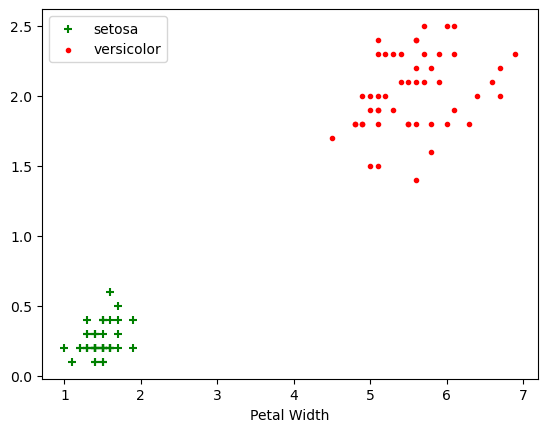

In [155]:
plt.xlabel('Petal Length')
plt.xlabel('Petal Width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='+',label='setosa')
# plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='_',label='virginica')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red',marker='.',label='versicolor')
plt.legend()

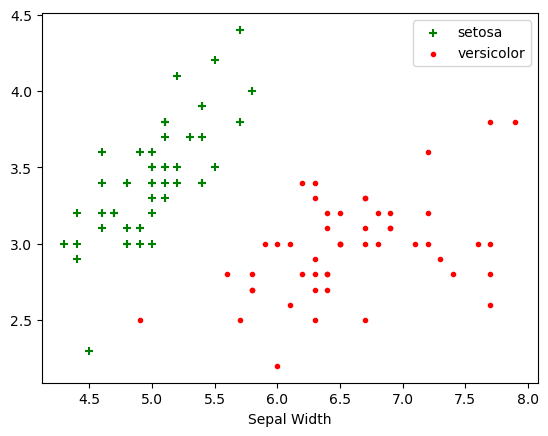

In [154]:
plt.xlabel('Sepal Length')
plt.xlabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+',label='setosa')
# plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='_',label='virginica')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red',marker='.',label='versicolor')
plt.legend()

In [157]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [158]:
X=df.drop(['target','flower_name'],axis='columns')
y=df.target

In [161]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
X_train.shape

(120, 4)

In [162]:
X.shape

(150, 4)

In [166]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)

In [167]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [175]:
y_pred = knn.predict(X_test)

/home/aayush/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [171]:
knn.score(X_test,y_test)

/home/aayush/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9666666666666667

In [173]:
knn.predict([[4.8,3.0,1.5,0.3]])

/home/aayush/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/aayush/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0])

In [176]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

/home/aayush/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Text(58.222222222222214, 0.5, 'Truth')

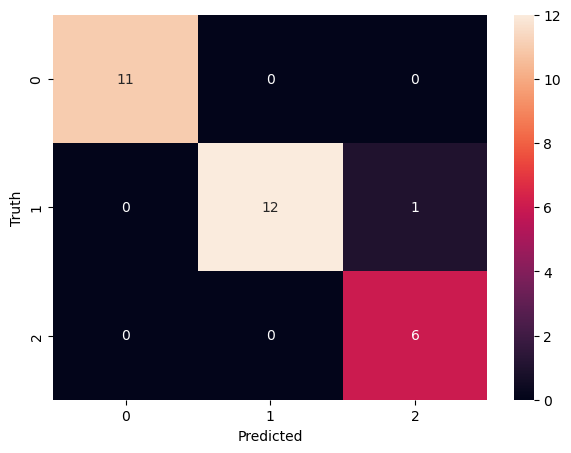

In [177]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [178]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

